# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

#getting rid of white spaces, and converting attributes to ints and floats
def make_int(text):
    if(text==''):
        return text
    else:
        return int(text.strip('" '))

def make_float(text):
    if(text==''):
        return text
    else:
        return float(text.strip('" '))

#importing files and checking for bad lines
redFile = pd.read_csv("winequality-red.csv", sep=';', decimal='.', header=0, 
                      names=['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 
                             'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
                      converters = {'fixedAcidity' : make_float,
                                    'volatileAcidity' : make_float,
                                    'citricAcid' : make_float,
                                    'residualSugar' : make_float,
                                    'chlorides' : make_float,
                                    'freeSulfurDioxide' : make_float,
                                    'totalSulfurDioxide' : make_float,
                                    'density' : make_float,
                                    'pH' : make_float,
                                    'sulphates' : make_float,
                                    'alcohol' : make_float,
                                    'quality' : make_int},
                      error_bad_lines=False)

whiteFile = pd.read_csv("winequality-white.csv", sep=';', decimal='.', header=0,
                        names=['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 
                               'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
                        converters = {'fixedAcidity' : make_float,
                                    'volatileAcidity' : make_float,
                                    'citricAcid' : make_float,
                                    'residualSugar' : make_float,
                                    'chlorides' : make_float,
                                    'freeSulfurDioxide' : make_float,
                                    'totalSulfurDioxide' : make_float,
                                    'density' : make_float,
                                    'pH' : make_float,
                                    'sulphates' : make_float,
                                    'alcohol' : make_float,
                                    'quality' : make_int},
                        error_bad_lines=False)

#returns the names of columns that contain missing values. (there are none)
def missing_values(sample):
    for i in sample:
        if sample[i].isna().any()==True:
            print i
        else:
            pass

        
#returns the IQRS, min, max of each column
def quartiles(sample):
    return(sample.describe(percentiles=[0.25,0.75]).loc[['min','25%','50%','75%','max']])

#returns the lower bound and upper bound#If we are using KNN where K>1, outliers will not affect the classification
#if we are using DTC outliers will not affect the classification as nodes are split on range, not absolute values.
#therefore we chose to not get rid of the outliers. of each column, beyond which observations are outliers.
def outlier_detect(sample):
    for i in sample:
        IQR=sample[i].quantile(0.75)-sample[i].quantile(0.25)
        lower_bound= sample[i].quantile(0.25)-(1.5*IQR)
        upper_bound= sample[i].quantile(0.75)+(1.5*IQR)
        print('{x}: [{y},{z}]'.format(x=i, y=lower_bound, z=upper_bound ))



# DATA VISUALISATION

VISUAL REPRESNTATION OF 10 VARIABLES:

In [2]:
import matplotlib.pyplot as plt

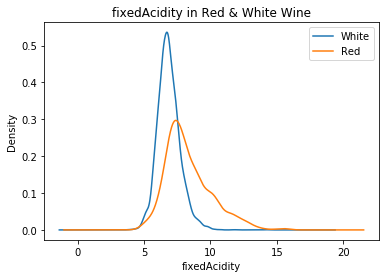

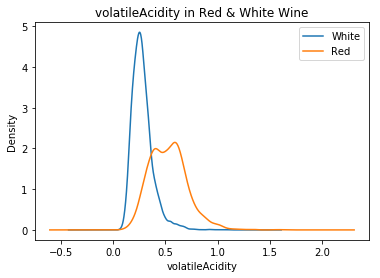

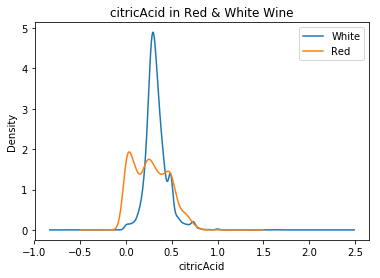

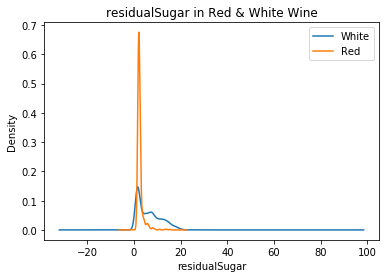

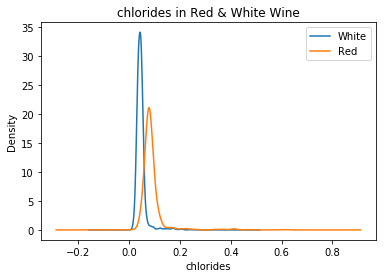

In [3]:
#method for creating and showing density charts from a given list
def make_density(x):
    for i in x:
        a = whiteFile[i].plot(kind='density')
        a = redFile[i].plot(kind='density')
        a.set_xlabel(i)

        plt.legend({"White","Red"},loc="best")

        a.set_title('{} in Red & White Wine'.format(i))

        plt.show()

make_density(['fixedAcidity','volatileAcidity','citricAcid','residualSugar','chlorides'])

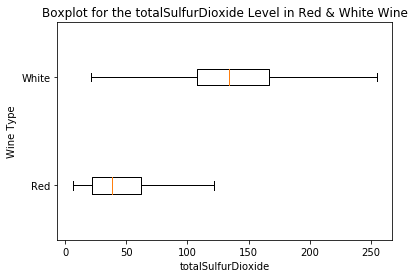

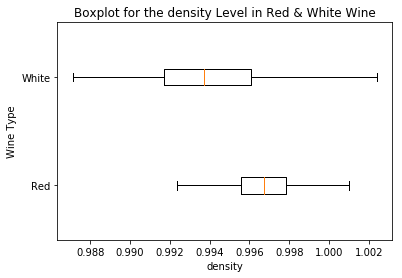

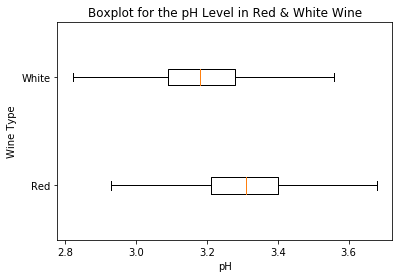

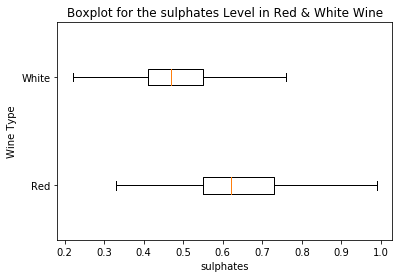

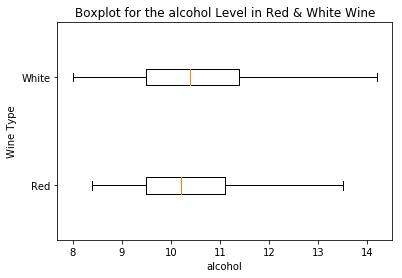

In [4]:
#generic function to make boxplots of all df-variables in a list.
#note: we have excluded outliers as we arent concerned about them.
def make_boxplot(x):
    for i in x:
        plt.boxplot(x=(redFile[i], whiteFile[i]), 
            labels=('Red','White'), vert=False, sym='') 
        plt.title('Boxplot for the {} Level in Red & White Wine'.format(i))
        plt.xlabel('{}'.format(i))
        plt.ylabel('Wine Type')
        plt.show()

make_boxplot(['totalSulfurDioxide','density','pH','sulphates','alcohol' ])

For the pairing visualisations and for the classification model, we would have to combine the data. 

In [5]:
#code from https://stackoverflow.com/questions/23615496/removing-the-first-line-of-csv-file and 
#https://stackoverflow.com/questions/54749793/appending-rows-from-one-csv-to-another-in-python

import os

if os.path.exists("allWine.csv"):
  os.remove("allWine.csv")

with open('winequality-white.csv', 'r') as f1:
    whiteWineCSV = f1.read()
    
with open('winequality-red.csv', 'r') as f2:
    with open("updated_redWine.csv",'w') as f3:
        next(f2)
        for line in f2:
            f3.write(line)
            
with open('updated_redWine.csv', 'r') as f4:
    redWineCSV = f4.read()

with open('allWine.csv', 'a') as f5:
    f5.write(whiteWineCSV)
    f5.write(redWineCSV)
    
os.remove("updated_redWine.csv")

In [6]:
#combined red and white wine file
allWine = pd.read_csv("allWine.csv", sep=';', decimal='.', header=0, 
                      names=['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 
                             'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
                      converters = {'fixedAcidity' : make_float,
                                    'volatileAcidity' : make_float,
                                    'citricAcid' : make_float,
                                    'residualSugar' : make_float,
                                    'chlorides' : make_float,
                                    'freeSulfurDioxide' : make_float,
                                    'totalSulfurDioxide' : make_float,
                                    'density' : make_float,
                                    'pH' : make_float,
                                    'sulphates' : make_float,
                                    'alcohol' : make_float,
                                    'quality' : make_int},
                      error_bad_lines=False)

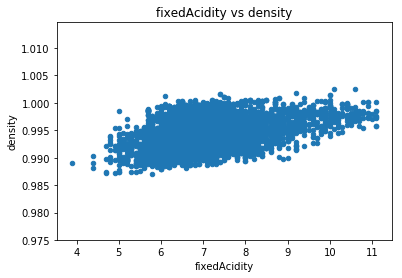

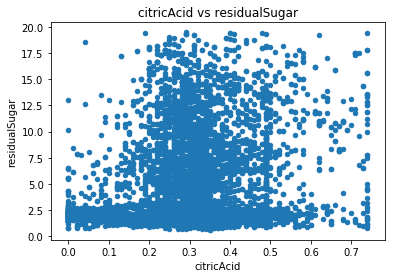

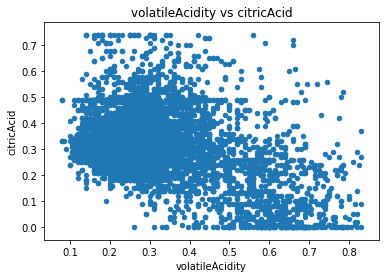

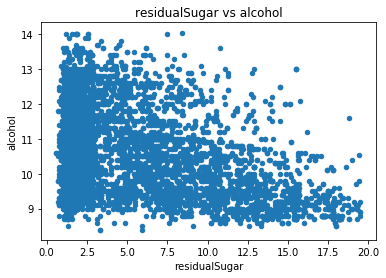

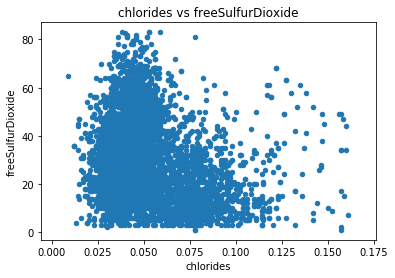

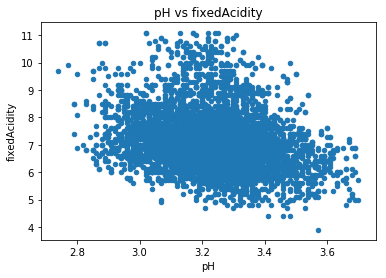

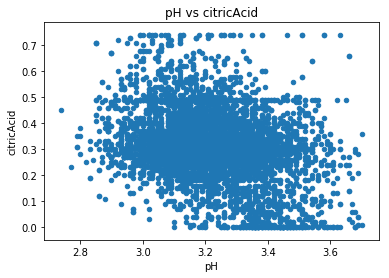

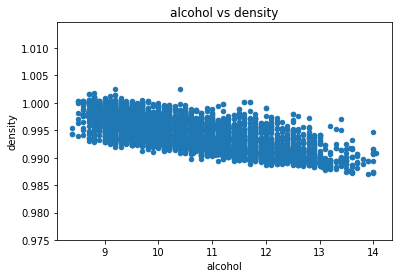

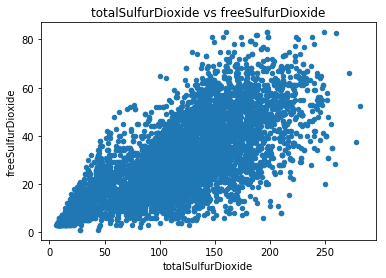

In [7]:
from scipy import stats
allWine = allWine[(np.abs(stats.zscore(allWine)) < 3).all(axis=1)]

#function to create scatter plots for comparison of attributes
def make_scatter(x):
    for i in x:
        ax = allWine.plot.scatter(x=i[0],y=i[1])

        ax.set_title('{} vs {}'.format(i[0],i[1]))
        
        plt.show()
        
make_scatter([['fixedAcidity', 'density'],['citricAcid', 'residualSugar'],
              ['volatileAcidity','citricAcid'],['residualSugar','alcohol'],['chlorides','freeSulfurDioxide'],
              ['pH','fixedAcidity'],['pH','citricAcid'],['alcohol','density'],['totalSulfurDioxide','freeSulfurDioxide']])

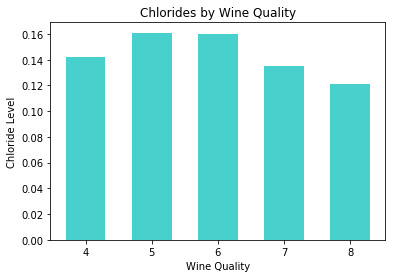

In [8]:
#bar graph needed for comparing wine quality and chlorides
plt.bar(allWine['quality'], allWine['chlorides'], color ='mediumturquoise', width=0.6)
plt.title("Chlorides by Wine Quality")
plt.xlabel('Wine Quality')
plt.ylabel('Chloride Level')
plt.show()
#hyp: Chlorides in wine create an undesirable salty taste that redces its market appeal
#this is observed as we can see higher quality wines have a lower chloride level
#however, the difference in chloride levels of each quality category isnt visually significant. 
#This may be because wine quality is determined by other factors too. 
#for instance, market appeal may also depend on price relative to chloride levels. 
#http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095

# DATA MODELLING using MACHINE LEARNING

In [9]:
#adding attribute that determines wine colour
allWine['wineColour'] = 'wine'
allWine['wineColour'].loc[0:4898].replace('wine','1',inplace=True) #1 for white wine
allWine['wineColour'].loc[4900:].replace('wine','0',inplace=True) #0 for red wine
allWine['wineColour'].apply(make_float)

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
       ... 
6465    0.0
6466    0.0
6467    0.0
6469    0.0
6470    0.0
6471    0.0
6473    0.0
6474    0.0
6475    0.0
6476    0.0
6477    0.0
6478    0.0
6479    0.0
6480    0.0
6481    0.0
6482    0.0
6483    0.0
6484    0.0
6485    0.0
6486    0.0
6487    0.0
6488    0.0
6489    0.0
6490    0.0
6491    0.0
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: wineColour, Length: 5989, dtype: float64

K-NEAREST NEIGHBOURS CLASSIFIER


In [10]:
for i in [50,40,20]:
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import StandardScaler 
    from sklearn.neighbors import KNeighborsClassifier

    n_samples=len(allWine['wineColour'])
    y=np.array(allWine['wineColour'])
    x= np.array(allWine.drop('wineColour', axis=1)).reshape((n_samples,-1))
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,test_size=(i*0.01))


    sc_x = StandardScaler()  
    x_train = sc_x.fit_transform(x_train)  #to scale all columns
    x_test = sc_x.transform(x_test)


    clf = KNeighborsClassifier(61) 
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    confusion_matrix = confusion_matrix(y_test,predicted)
    classification_report = classification_report(y_test,predicted)
    accuracy_train = clf.score(x_train, y_train)
    accuracy_test = clf.score(x_test, y_test)


    print('THE RESULTS FOR {tr}% TRAIN AND {te}% TEST SPLIT ARE AS FOLLOWS:'.format(te=i,tr=(100-i)))
    print("      ")
    if accuracy_train > accuracy_test:
          print('Overfitting')
    else:
          print('Not overfitting')
    print("      ")
    print("Accuracy Train:",accuracy_train, "Accuracy Test:", accuracy_test)
    
    print('''
    Confusion Matrix:
    {}
    '''.format(confusion_matrix))
    
    print('''
    Classification Report: 
    {}
    '''.format(classification_report))
    print('-'*80)

THE RESULTS FOR 50% TRAIN AND 50% TEST SPLIT ARE AS FOLLOWS:
      
Overfitting
      
('Accuracy Train:', 0.9919839679358717, 'Accuracy Test:', 0.9876460767946578)

    Confusion Matrix:
    [[ 611   20]
 [  17 2347]]
    

    Classification Report: 
                  precision    recall  f1-score   support

           0       0.97      0.97      0.97       631
           1       0.99      0.99      0.99      2364

   micro avg       0.99      0.99      0.99      2995
   macro avg       0.98      0.98      0.98      2995
weighted avg       0.99      0.99      0.99      2995

    
--------------------------------------------------------------------------------
THE RESULTS FOR 60% TRAIN AND 40% TEST SPLIT ARE AS FOLLOWS:
      
Not overfitting
      
('Accuracy Train:', 0.9908154745338158, 'Accuracy Test:', 0.9908180300500835)

    Confusion Matrix:
    [[ 502   12]
 [  10 1872]]
    

    Classification Report: 
                  precision    recall  f1-score   support

           0  

In [11]:
#came up with parameters by trial and error

DECISION TREE CLASSIFIER

In [12]:
allWine_feature_names=np.array(allWine.drop('wineColour', axis=1).columns.tolist())
allWine_target_names = np.array(allWine['wineColour'].unique())
#this is done to name the variables required for the decision tree.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

for i in [50,40,20]:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier

    n_samples=len(allWine['wineColour'])
    y=np.array(allWine['wineColour'])
    x= np.array(allWine.drop('wineColour', axis=1)).reshape((n_samples,-1))
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,test_size = (i*0.01))


    sc_x = StandardScaler()  
    x_train = sc_x.fit_transform(x_train)  #to scale all columns
    x_test = sc_x.transform(x_test)


    clf = DecisionTreeClassifier(min_samples_split=150,max_depth=10,min_samples_leaf=200) 
    fit=clf.fit(x_train,y_train)
    predicted=fit.predict(x_test)
    confusion_matrix = confusion_matrix(y_test,predicted)
    classification_report = classification_report(y_test,predicted)
    accuracy_train = clf.score(x_train, y_train)
    accuracy_test = clf.score(x_test, y_test)

    print('THE RESULTS FOR {tr}% TRAIN AND {te}% TEST SPLIT ARE AS FOLLOWS:'.format(te=i,tr=(100-i)))
    print("      ")
    if accuracy_train > accuracy_test:
          print('Overfitting')
    else:
          print('Not overfitting')
    print("      ")
    print("Accuracy Train:",accuracy_train, "Accuracy Test:", accuracy_test)
    
    print('''
    Confusion Matrix:
    {}
    '''.format(confusion_matrix))
    
    print('''
    Classification Report: 
    {}
    '''.format(classification_report))
    print('-'*80)
    
    from sklearn import tree
    with open("{} dtc.dot".format(i), 'w') as f:
        f= tree.export_graphviz(clf, out_file = f, feature_names = allWine_feature_names,
                                class_names = allWine_target_names, filled= True, rounded=True,
                                special_characters=True)

THE RESULTS FOR 50% TRAIN AND 50% TEST SPLIT ARE AS FOLLOWS:
      
Not overfitting
      
('Accuracy Train:', 0.9402137608550434, 'Accuracy Test:', 0.9409015025041736)

    Confusion Matrix:
    [[ 459  172]
 [   5 2359]]
    

    Classification Report: 
                  precision    recall  f1-score   support

           0       0.99      0.73      0.84       631
           1       0.93      1.00      0.96      2364

   micro avg       0.94      0.94      0.94      2995
   macro avg       0.96      0.86      0.90      2995
weighted avg       0.94      0.94      0.94      2995

    
--------------------------------------------------------------------------------
THE RESULTS FOR 60% TRAIN AND 40% TEST SPLIT ARE AS FOLLOWS:
      
Not overfitting
      
('Accuracy Train:', 0.9473977177845812, 'Accuracy Test:', 0.9478297161936561)

    Confusion Matrix:
    [[ 396  118]
 [   7 1875]]
    

    Classification Report: 
                  precision    recall  f1-score   support

          

In [14]:
#came up with parameters by trial and error

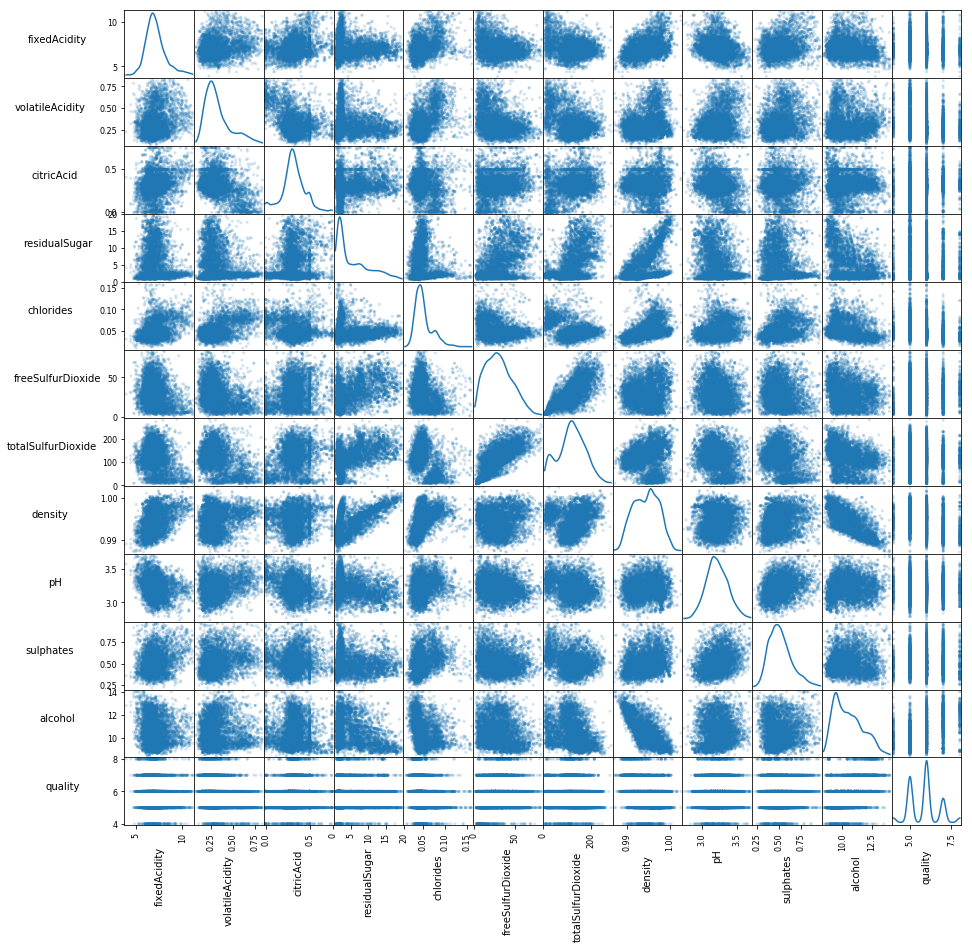

In [15]:
from pandas.plotting import scatter_matrix


#creating scatter matrix for presentation
scatplt = scatter_matrix(allWine, alpha=0.2, figsize=(15,15),diagonal='density')

#rotating x and y axis to make more readable
for x in range(12):
    for y in range(12):
        axis = scatplt[x, y]
        axis.xaxis.label.set_rotation(90)
        axis.yaxis.label.set_rotation(0)
        axis.yaxis.labelpad = 50

plt.show()